# Code to generate MNIST images with color

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Helper function to show multiple images at once, in a grid.
def show_images_grid(imgs_, num_images=25):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i] )#, cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

In [3]:
# Load MNIST data from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# Convert pixel values from 0 to 255 to [0,1] range
x_train = x_train/255.
x_test = x_test/255.

## Example: change an image of an 8 to a green 8

8


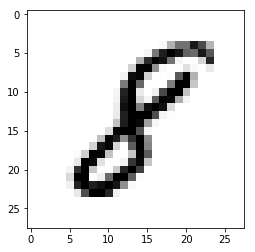

In [5]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
test = x_train[image_index]
test = np.reshape(test, (-1, 28, 28, 1))


In [7]:
#new = np.concatenate((test, test, test), axis=3)
new = np.concatenate([np.zeros((1, 28, 28, 1)), test, np.zeros((1, 28, 28, 1))], axis=3)


In [8]:
print(new.shape)

(1, 28, 28, 3)


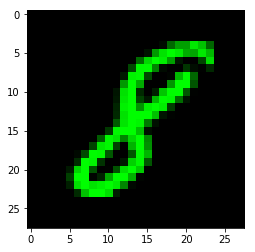

In [9]:
plt.imshow(new[0])

# Change y labels

In [10]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [11]:
new_y_train = np.array([1 if y > 4 else 0 for y in y_train])
new_y_test = np.array([1 if y > 4 else 0 for y in y_test])

In [12]:
# add noise to label

# I SKIP THIS STEP FOR NEW DATASET
for i, y in enumerate(new_y_train):
    if np.random.random() < 0.25:
        new_y_train[i] = 1 - y

for i, y in enumerate(new_y_test):
    if np.random.random() < 0.25:
        new_y_test[i] = 1 - y
        

In [13]:
new_y_train_dub = np.vstack((1 - new_y_train, new_y_train)).T
print(new_y_train_dub)
new_y_test_dub = np.vstack((1 - new_y_test, new_y_test)).T
new_y_test_dub

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [0 1]
 [1 0]]


array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

# Decide on color schemes

In [14]:
n = 10000

In [15]:
# study 1: red for y=0, green for y=1
# flip colors 20% of time

colors_1 = np.copy(new_y_train[:n])
for i, c in enumerate(colors_1):
    if np.random.random() < 0.2:
        colors_1[i] = 1 - c


# study 2: red for y=0, green for y=1
# flip colors 10% of the time
colors_2 = np.copy(new_y_train[n:2*n])
for i, c in enumerate(colors_2):
    if np.random.random() < 0.1:
        colors_2[i] = 1 - c


# study 3: red for y=0, green for y=1
# flip colors 90% of the time
colors_3 = np.copy(new_y_train[2*n:3*n])
for i, c in enumerate(colors_3):
    if np.random.random() < 0.9:
        colors_3[i] = 1 - c
        
        
# test: red for y=0, green for y = 1
# flip colors 70% of the time

colors_test = np.copy(new_y_test[:n])
for i, c in enumerate(colors_test):
    if np.random.random() < 0.7:
        colors_test[i] = 1 - c

In [16]:
print(colors_1, colors_2, colors_test)

[0 0 0 ... 1 1 1] [0 0 1 ... 0 0 1] [0 1 1 ... 0 1 1]


In [17]:
np.sum(np.abs(colors_1 - new_y_train[:n]))

2031

# Change colors

In [18]:
numstudies = 3
new_x_train = np.zeros((numstudies*n, 28, 28, 3))
new_x_test = np.zeros((n, 28, 28, 3))

In [19]:
# study 1
for i in range(n):
    img = np.reshape(x_train[i], (28, 28, 1))
    if colors_1[i] == 0: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    else: # turn green
        new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[i] = new
    
# study 2
for i in range(n):
    img = np.reshape(x_train[n+i], (28, 28, 1))
    if colors_2[i] == 0: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    else: # turn green
        new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[n+i] = new
    
# study 3
for i in range(n):
    img = np.reshape(x_train[2*n + i], (28, 28, 1))
    if colors_3[i] == 0: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    else: # turn green
        new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_train[2*n + i] = new
    
# test
for i in range(n):
    img = np.reshape(x_test[i], (28, 28, 1))
    if colors_test[i] == 0: # turn red
        new = np.concatenate([img, np.zeros(( 28, 28, 1)), np.zeros(( 28, 28, 1))], axis=2)
    else: # turn green
        new = np.concatenate([np.zeros(( 28, 28, 1)), img, np.zeros(( 28, 28, 1))], axis=2)
    new_x_test[i] = new

In [20]:
np.mean(np.mean(np.mean(new_x_test, axis=0), axis=0), axis=0)

array([0.064241  , 0.06827361, 0.        ])

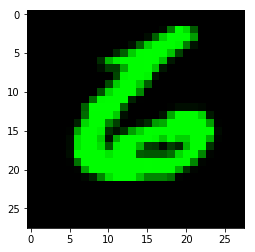

In [21]:
#plt.imshow(new_x_train[2*n+1000])
plt.imshow(new_x_test[n-1])

In [22]:
new_attr_train =  np.concatenate( [ np.vstack([np.ones(n), np.zeros(n), np.zeros(n)]).T, 
                                   np.vstack([np.zeros(n), np.ones(n), np.zeros(n)]).T,
                                   np.vstack([np.zeros(n), np.zeros(n), np.ones(n)]).T])
print(new_attr_train)
print(new_attr_train.shape)

new_attr_test = np.vstack([np.ones(n), np.zeros(n), np.zeros(n)]).T
print(new_attr_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(30000, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [23]:
new_x_train_reshape = np.reshape(new_x_train, (numstudies*n, 28*28*3))
new_x_test_reshape = np.reshape(new_x_test, (n, 28*28*3))
print(new_x_train_reshape.shape)

(30000, 2352)


In [24]:
new_y_train_reshape = new_y_train_dub[:numstudies*n]
print(new_y_train_reshape.shape)
new_y_test_reshape = new_y_test_dub[:n]
new_y_test_reshape.shape

(30000, 2)


(10000, 2)

In [26]:
numstudies = 1
inds_shuffled = np.random.permutation(numstudies*n)
train_inds = inds_shuffled[:int(.8 * numstudies*n)]
valid_inds = inds_shuffled[int(.8 * numstudies*n):]
print(len(train_inds), len(valid_inds))

8000 2000


# Save new dataset

In [27]:
num = n
save_file = 'mnist_1study_081419.npz'
np.savez(save_file, 
         x_train = new_x_train_reshape[:num], 
         x_test = new_x_test_reshape, 
         y_train = new_y_train_reshape[:num], 
         y_test = new_y_test_reshape, 
         attr_train = new_attr_train[:num],
         attr_test = new_attr_test,
         train_inds = train_inds,
         valid_inds = valid_inds)

'''
np.savez('mnist_nonoise_072219.npz', 
         x_train = new_x_train_reshape, 
         x_test = new_x_test_reshape, 
         y_train = new_y_train_reshape, 
         y_test = new_y_test_reshape, 
         attr_train = new_attr_train,
         attr_test = new_attr_test,
         train_inds = train_inds,
         valid_inds = valid_inds)
'''

"\nnp.savez('mnist_nonoise_072219.npz', \n         x_train = new_x_train_reshape, \n         x_test = new_x_test_reshape, \n         y_train = new_y_train_reshape, \n         y_test = new_y_test_reshape, \n         attr_train = new_attr_train,\n         attr_test = new_attr_test,\n         train_inds = train_inds,\n         valid_inds = valid_inds)\n"

# And that's it for generating the color dataset!
### Things that could be changed include:
- using more colors, eg. red and green in study 1, green and blue in study 2, and blue and red in study 3, etc.
- adding lateral translations of images or adding noise

# Examining reconstruction results (and comparing to ground-truth data)
The rest of this notebook has code I used to compare the results from model reconstructions to the original inputs.

In [48]:
myfilename = '/Users/Frances/Documents/seas-fellowship/rvr/data/mnist/mnist_072019.npz'
data = np.load(myfilename)

In [35]:
np.mean(data['attr_train'], axis=0)

array([1., 0., 0.])

In [195]:
from sys import getsizeof
getsizeof(data['x_train'])
#data['x_test'].shape
122880112

564480112

In [38]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [348]:
this_valid_inds= data['valid_inds']

In [42]:
# Load outputs from the decoder (the reconstructed inputs)

#xhat = np.load('/Users/Frances/Documents/seas-fellowship/rvr/mnist_fair10_recon005_ep9500_xhat.npz')['X']
xhat = np.load('/Users/Frances/Documents/seas-fellowship/rvr/mnist_no_studyid_class0_fair0_recon05_valid_xhat.npz')['X']
print(xhat.shape)


(5951, 2352)


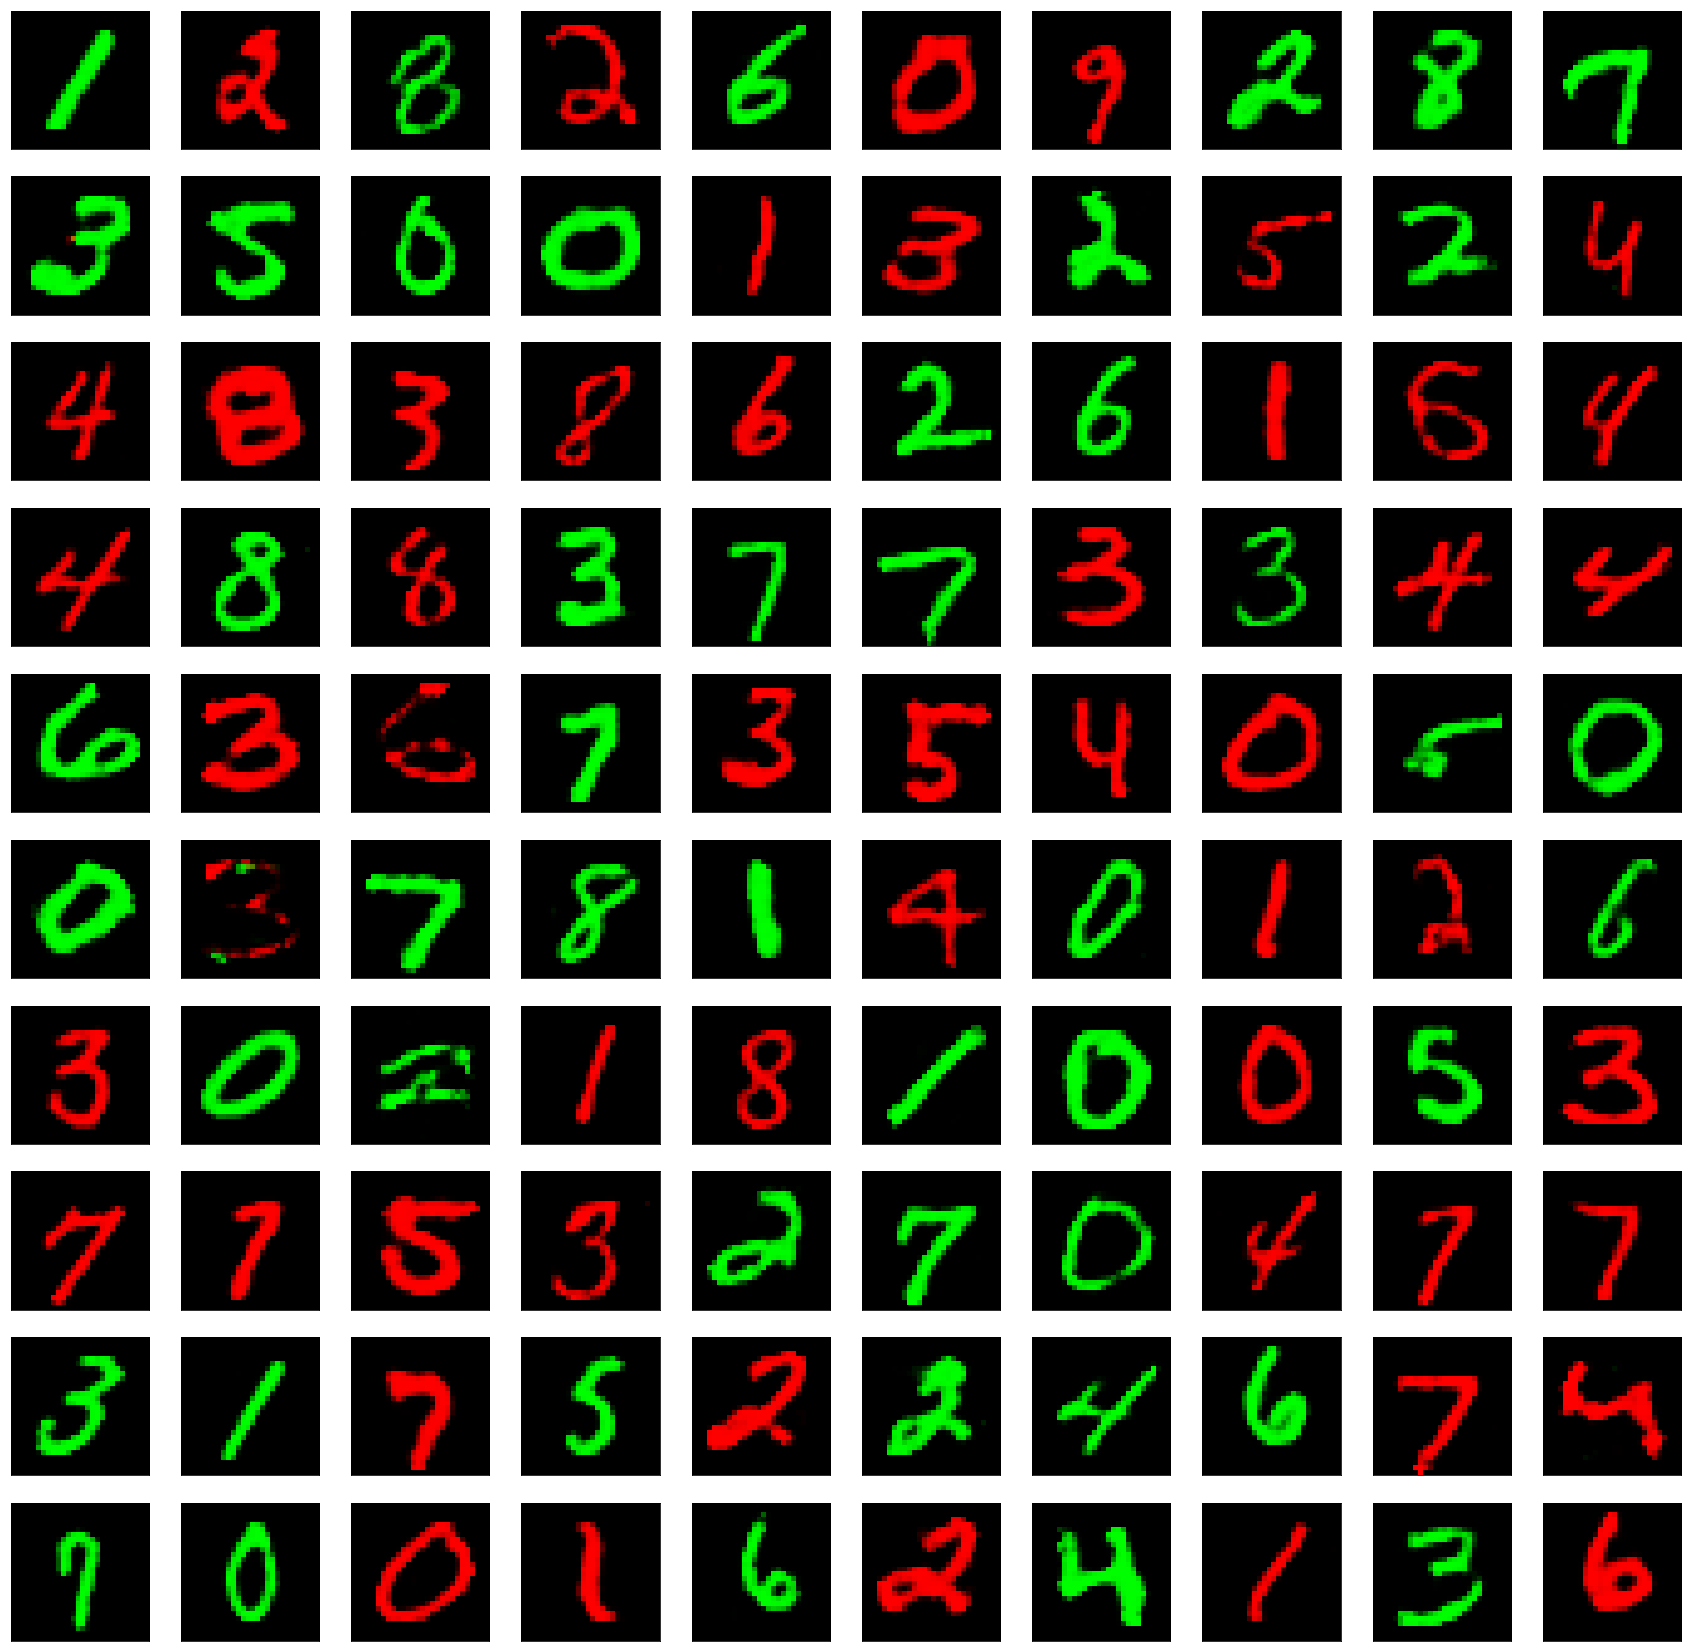

In [43]:
num = 100
#plt.imshow(np.reshape(xhat[idx], (28, 28, 3)))
#show_images_grid(np.reshape(sigmoid(xhat[study3_idx[:num]]), (-1, 28, 28, 3)), num)
show_images_grid(np.reshape(sigmoid(xhat[:num]), (-1, 28, 28, 3)), num)

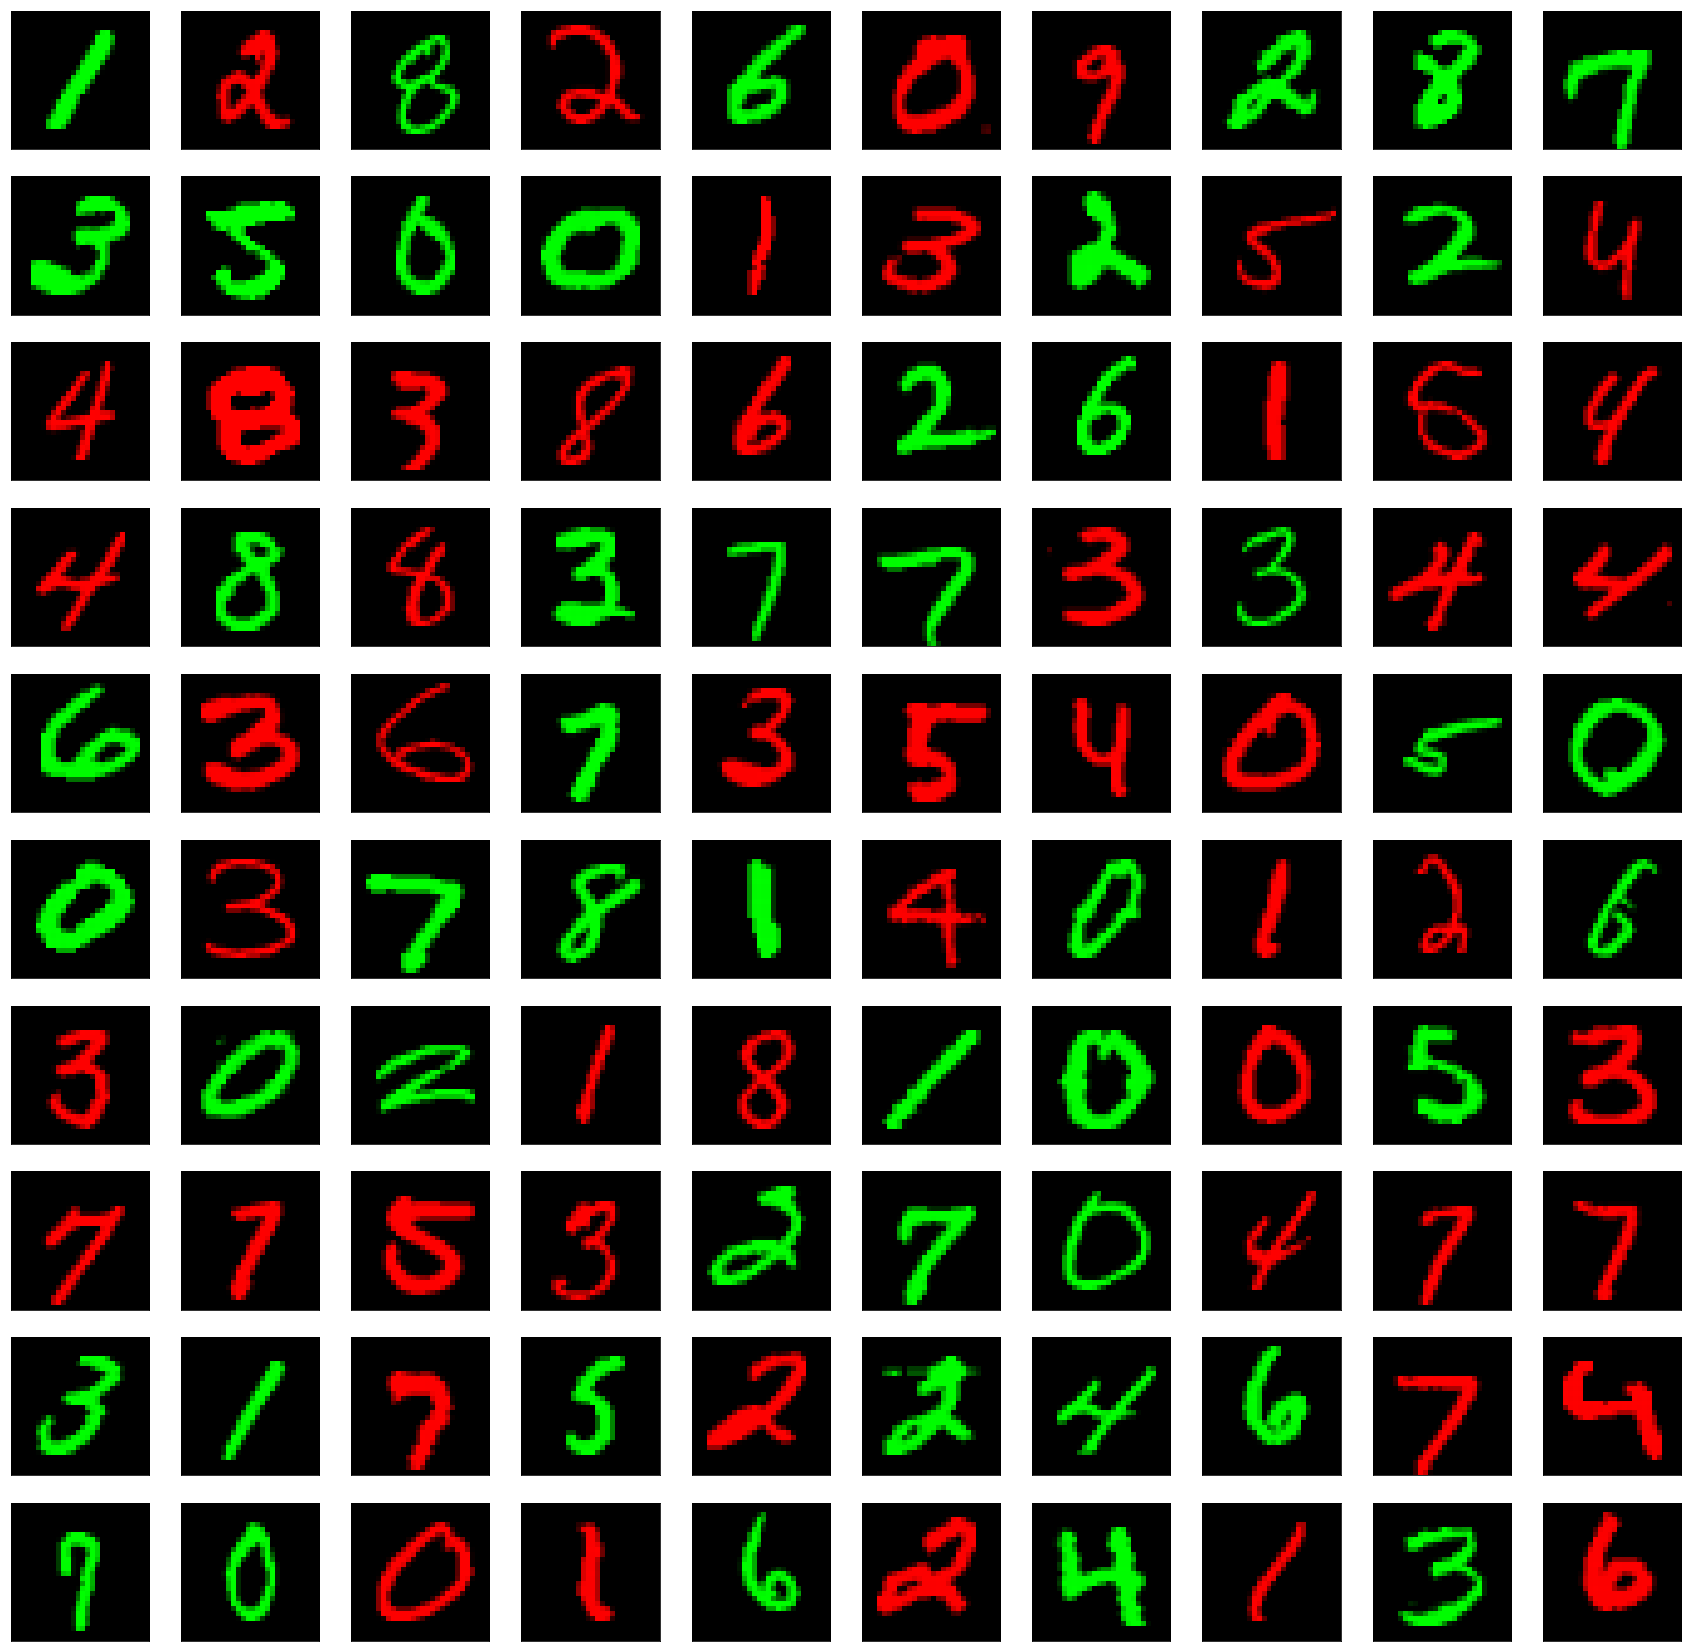

In [49]:
# show ground truth images
show_images_grid(np.reshape(data['x_train'][data['valid_inds'][:num]], (-1, 28, 28, 3)), num)

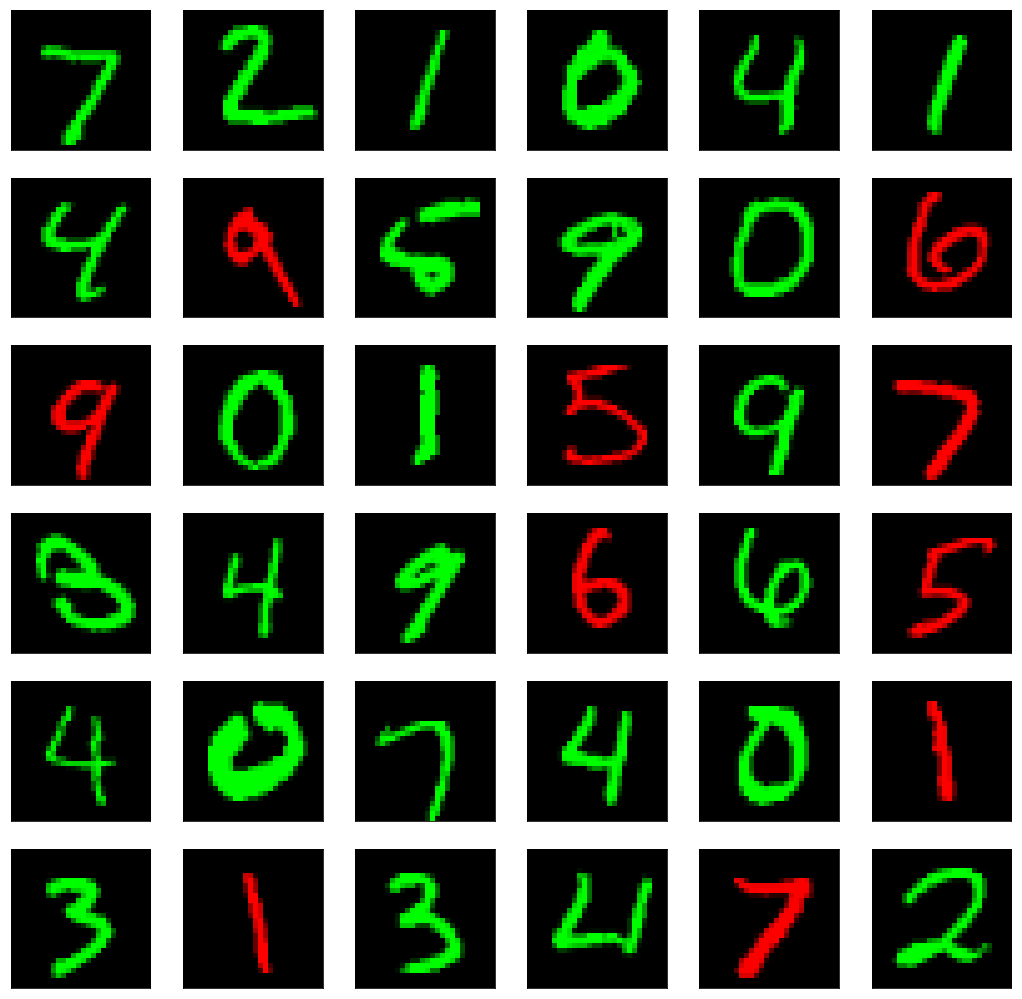

In [312]:
show_images_grid(np.reshape(new_x_test_reshape[:36], (-1, 28, 28, 3)), 36)

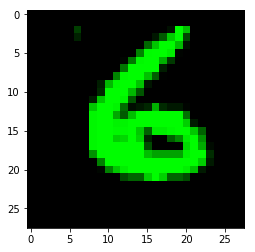

In [339]:
plt.imshow(np.reshape(new_x_train_reshape[valid_inds[0]], (28, 28,3)))

In [332]:
y_train[valid_inds[:9]]

array([6, 4, 8, 1, 9, 4, 0, 2, 3], dtype=uint8)

In [404]:
study1_idx = []
study2_idx = []
study3_idx = []
for idx, attr in enumerate(new_attr_train[this_valid_inds[:5951]]):
    if attr[0] == 1:
        study1_idx.append(idx)
    elif attr[1] == 1:
        study2_idx.append(idx)
    elif attr[2] == 1:
        study3_idx.append(idx)
study1_idx = np.array(study1_idx)
study2_idx = np.array(study2_idx)
study3_idx = np.array(study3_idx)

In [370]:
print(study1_idx.shape, study2_idx.shape, study3_idx.shape)

(12,) (12,) (16,)


In [221]:
new_x_train_reshape.shape

(30000, 2352)

[1 0]


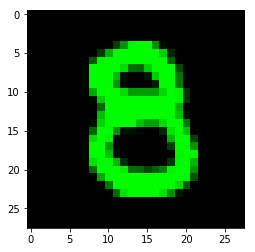

[1 0]


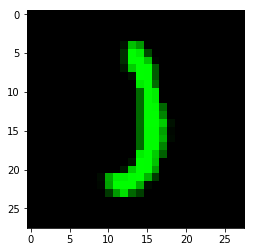

[1 0]


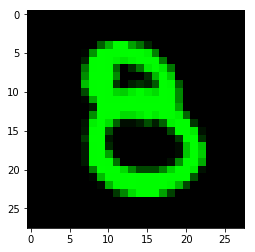

[0 1]


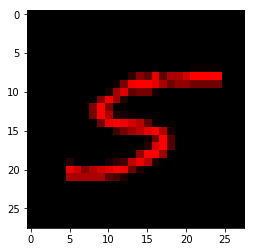

[0 1]


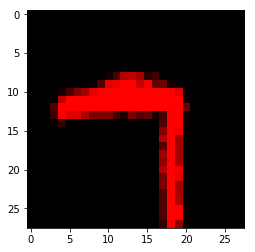

In [239]:
for idx in range(2*n+35, 2*n+40):
    plt.imshow(np.reshape(new_x_train_reshape[idx], (28, 28, 3)))
    print(new_y_train_reshape[idx])
    plt.show()

In [231]:
for idx in range(n+10, n+20):
    print(new_y_train_reshape[idx])

[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
